# Variables

 $\omega_i = \text{ angular velocities}$<br>
 $I_i = \text{ inertias of the satellite}$<br>
 $J_t = \text{ tangential inertia of the wheel torque}$<br>
 $h = \text{ constant angular momentum of the wheel}$<br>
 $u = \text{ wheel torque}$<br>
 $K_1 = I_1 + J_t$<br>
 $K_3 = I_3 + J_t$<br>

 $K_1\dot{w_1} = (I_2 - K_3)\omega_2w_3 + hw_3$<br>
 $I_2\dot{w_2} = (K_3 - K_1)\omega_1w_3 - u$<br>
 $K_3\dot{w_3} = (K_1 - I_2)\omega_1w_2 - hw_1$<br>
 $h = u = 0$

0.0
0.0
0.0
0.0
0.0


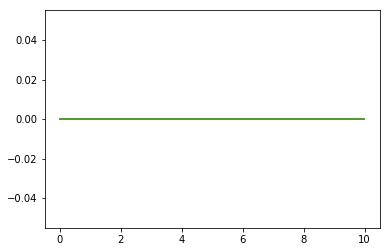

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import csv
# Y_1' = y' = Y_2; Y_1(0)=0
# Y_2' = y'' = -Y_1; Y_2(0)=1 (from the DE)
#

c_W1=13
c_W2=14
c_W3=15

#Stepsize
h=0.01

#x-value array
xvals=np.arange(0,10,h)

#Solution arrays

file = np.loadtxt("DataSet.csv", delimiter=",")

W1=[file[0][c_W1]]
W2=[file[0][c_W2]]
W3=[file[0][c_W1]]


def f(x,w2,w3):
	return w2*w3
def g(x,w1,w3):
	return w1*w3
def e(x,w1,w2):
	return w1*w2


# k functions
def k1(xn,w1n,w2n):
	return h*f(xn,w1n,w2n)
def k2(xn,w1n,w2n):
	return h*f(xn+h/2,w1n+k1(xn,w1n,w2n)/2, w2n+l1(xn,w1n,w2n)/2)
def k3(xn,w1n,w2n):
        return h*f(xn+h/2,w1n+k2(xn,w1n,w2n)/2, w2n+l2(xn,w1n,w2n)/2)
def k4(xn,w1n,w2n):
	return h*f(xn+h,w1n+k3(xn,w1n,w2n), w2n+l3(xn,w1n,w2n))
def k(xn,w1n,w2n):
	return (1.0/6.0)*(k1(xn,w1n,w2n)+2*k2(xn,w1n,w2n)+2*k3(xn,w1n,w2n)+k4(xn,w1n,w2n))

# l functions
def l1(xn,w1n,w2n):
        return h*g(xn,w1n,w2n)
def l2(xn,w1n,w2n):
        return h*g(xn+h/2,w1n+k1(xn,w1n,w2n)/2, w2n+l1(xn,w1n,w2n)/2)
def l3(xn,w1n,w2n):
        return h*g(xn+h/2,w1n+k2(xn,w1n,w2n)/2, w2n+l2(xn,w1n,w2n)/2)
def l4(xn,w1n,w2n):
        return h*g(xn+h,w1n+k3(xn,w1n,w2n), w2n+l3(xn,w1n,w2n))
def l(xn,w1n,w2n):
        return (1.0/6.0)*(l1(xn,w1n,w2n)+2*l2(xn,w1n,w2n)+2*l3(xn,w1n,w2n)+l4(xn,w1n,w2n))
       
# m functions
def m1(xn,w1n,w2n):
        return h*e(xn,w1n,w2n)
def m2(xn,w1n,w2n):
        return h*e(xn+h/2,w1n+k1(xn,w1n,w2n)/2, w2n+l1(xn,w1n,w2n)/2)
def m3(xn,w1n,w2n):
        return h*e(xn+h/2,w1n+k2(xn,w1n,w2n)/2, w2n+l2(xn,w1n,w2n)/2)
def m4(xn,w1n,w2n):
        return h*e(xn+h,w1n+k3(xn,w1n,w2n), w2n+l3(xn,w1n,w2n))
def m(xn,w1n,w2n):
        return (1.0/6.0)*(l1(xn,w1n,w2n)+2*l2(xn,w1n,w2n)+2*l3(xn,w1n,w2n)+l4(xn,w1n,w2n))
    
    
n=0
while(n<len(xvals)-1):
	W1.append(W1[n]+k(xvals[n],W2[n],W3[n]))
	W2.append(W2[n]+l(xvals[n],W1[n],W3[n]))
	W3.append(W2[n]+m(xvals[n],W1[n],W2[n]))
	n+=1
    
    
print(k1(0,0,1))
print(k2(0,0,1))
print(k3(0,0,1))
print(k4(0,0,1))
print(k(0,0,1))

plt.plot(xvals,W1)
plt.plot(xvals,W2)
plt.plot(xvals,W3)
plt.show()


In [ ]:
#I_1 = (mass/12)*(width^2 + depth^2)
#I_2 = (mass/12)*(height^2 + depth^2)
#I_3 = (mass/12)*(width^2 + height^2)

# NASA Meeting 2/8

Talk at NASA: May 16, 9:00-10:30 <br>
Great Stage, NASA Wide, Visibility <br>
WIFI WVUPublic <br>
WIFI Password: passgodonotcollect$200<br>

There is a package in scipy to solve the equations. <br>
We are looking for what causes the problem to become chaotic. This defines our failure matrix. <br>
Ours is written on the slide. <br>
Use KNN and KDE which are in scikitlearn.<br>

We start with input vars created by monte carlo and get a solution out of the equation. <br>
Then run a script to run through our failure matrix for every set of input variables. <br>

Notebook cells can speak to each other. Can run functions from other cells. Place documentation surrounding each file to explain its use.<br>

Packagename for solving equations: <br>
scipy.integrate<br>
    odeint<br>

That is, (from scipy.integrate import odeint).<br>

Missing the physics background. <br>
We can assume $J_t = 0$.<br>

$I_x=\frac{m}{12}(d_y^2+d_z^2)$<br>
$I_y=\frac{m}{12}(d_x^2+d_z^2)$<br>
$I_z=\frac{m}{12}(d_x^2+d_y^2)$<br>


<U><B>Make a Plan<br></B></U>
Max suggested the following timeline:<br>
Solve equations by 2/15<br>
3 Weeks for Monte Carlo and Labeling Data<br>
3 Weeks for Machine Learning Algorithms<br>

Failure Matix:<br>
The satelite is in pure spin if the following:<br>
1) If $max(\omega_1) > .20 of max(\omega_2)$ then fail.<br>
2) If $max(\omega_3) > .20 of max(\omega_2)$ then fail.<br>


Error = $\sigma_{mc}$ = $\frac{1}{\sqrt[]{n}}$

Max suggested around a million, but he expects us to justify it.<br>
Use "Linear Interpolation" in package.<br>
Max only wants to see around 60s for this.<br>
Max wants one graph with all MC sims. Can also add more for just successes and just failures etc.
<B>INSERT PHONE PIC HERE</B>

<b>Next Meeting</b>: <Br>
Thu 2/22,  8:45